In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn import preprocessing

In [2]:
def load_files(path):
    loss = np.loadtxt(path+'training_loss.txt')
    acc = np.loadtxt(path+'accuracy.txt')
    domain = np.loadtxt(path+'domain_labels.txt')
    machine = np.loadtxt(path+'machine_labels.txt', dtype = str)
    Z = np.load(path+'Z_space.npy')

    le =  preprocessing.LabelEncoder()
    le.fit(machine)
    machine_num = le.transform(machine)
    machine_num = np.concatenate((machine_num, [0])) #FIXME
   
    return loss, acc, domain, machine, machine_num, Z

In [3]:
def plot_loss_acc(loss, acc, expriment_name):
    x = np.arange(0,len(loss))
    plt.figure(figsize = (10, 5))
    plt.subplot(1,2,1)
    plt.plot(x, loss)
    plt.title('Training Loss '+expriment_name)

    plt.subplot(1,2,2)
    plt.plot(x, acc)
    plt.title('Accuracy '+expriment_name)
    plt.ylim(0, 1)
    plt.show()



In [4]:
def TSNE_funtion(perplexity, lr, n_iter, Z,domain, machine_num, produce_visuals=True):
    Z_embedded = TSNE(n_components=2, perplexity = perplexity, learning_rate= lr,init='random', n_iter =n_iter).fit_transform(Z)
    if produce_visuals:
        plt.figure(figsize = (10, 5))
        plt.subplot(1,2,1)
        sns.scatterplot(x=Z_embedded[:, 0], y=Z_embedded[:, 1], hue=domain, palette=['red', 'blue', 'orange', 'green']).set(title="HER 2 domain visualization") 
        plt.subplot(1,2,2)
        sns.scatterplot(x=Z_embedded[:, 0], y=Z_embedded[:, 1], hue = machine_num, palette=['red', 'blue', 'orange', 'green']).set(title="HER 2 machine visualization")
        plt.show()

In [5]:
loss, acc, domain, machine, machine_num, Z = load_files('negative/')
loss_p, acc_p, domain_p, machine_p, machine_num_p, Z_p = load_files('positive/')

In [6]:
domain

array([3., 3., 2., 2., 2., 3., 2., 2., 1., 2., 3., 3., 3., 2., 3., 3., 3.,
       3., 3., 3., 2., 3., 3., 2., 2., 3., 2., 3., 2., 2., 2., 3., 3., 3.,
       2., 2., 2., 3., 3., 3., 2., 3., 2., 2., 2., 3., 2., 3., 2., 3., 3.,
       3., 3., 3., 3., 2., 2., 3., 2., 2., 2., 1., 2., 2., 3., 2., 3., 3.,
       2., 3., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 2., 2., 3., 3.,
       2., 2., 3., 2., 3., 3., 3., 2., 3., 2., 2., 2., 2., 3., 2., 2., 2.,
       3., 2., 2., 2., 1., 2., 3., 3., 3., 2., 2., 3., 2., 2., 2., 3., 3.,
       2., 2., 2., 3., 3., 3., 3., 2., 2., 2., 2., 3., 2., 3., 3., 3., 3.,
       2., 2., 2., 2., 3., 2., 3., 2., 3., 2., 2., 3., 3., 3., 3., 2., 2.,
       3., 2., 2., 2., 2., 3., 3., 3., 3., 2., 3., 3., 3., 3., 2., 3., 1.,
       3., 3., 3., 3., 3., 2., 3., 2., 3., 3., 2., 2., 3., 2., 2., 3., 3.,
       3., 3., 2., 2., 3., 3., 3., 2., 3., 2., 2., 3., 2., 3., 3., 3., 3.,
       2., 2., 3., 3., 2., 2., 3., 2., 3., 3., 2., 3., 3., 2., 2., 3., 2.,
       2., 3., 2., 3., 2.

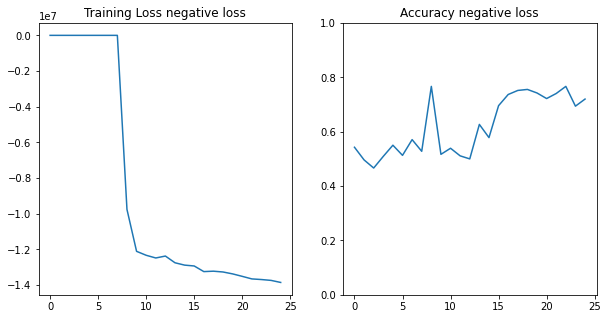

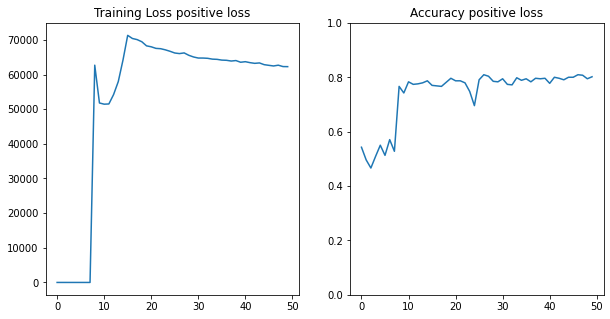

In [265]:
plot_loss_acc(loss, acc, 'negative loss')
plot_loss_acc(loss_p, acc_p, 'positive loss')

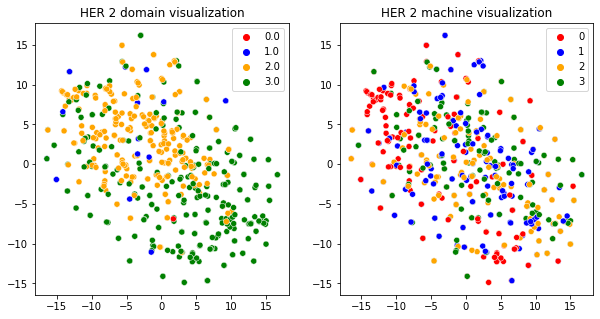

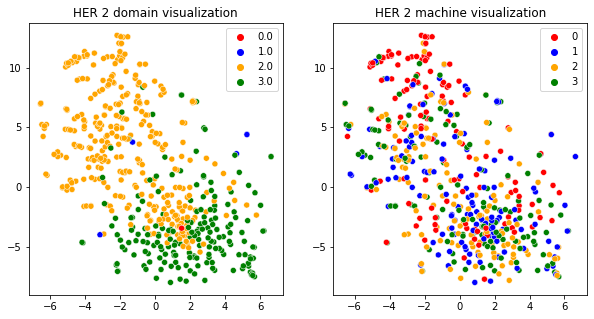

In [199]:
TSNE_funtion(6, 10, 350, Z,domain, machine_num, produce_visuals=True)
TSNE_funtion(6, 10, 350, Z_p,domain_p, machine_num_p, produce_visuals=True)

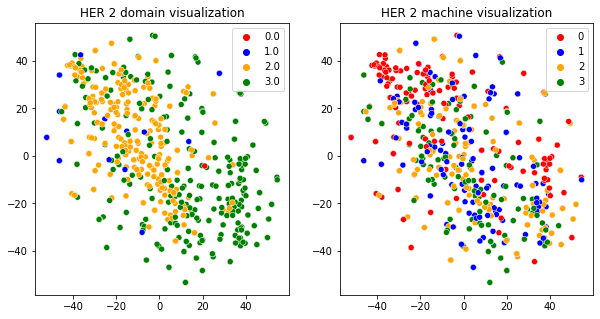

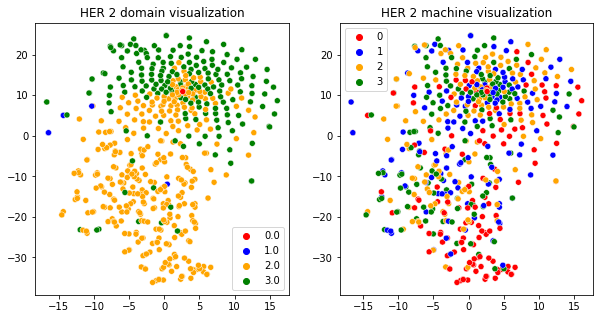

In [200]:
TSNE_funtion(6, 10, 875, Z,domain, machine_num, produce_visuals=True)
TSNE_funtion(6, 10, 875, Z_p,domain_p, machine_num_p, produce_visuals=True)

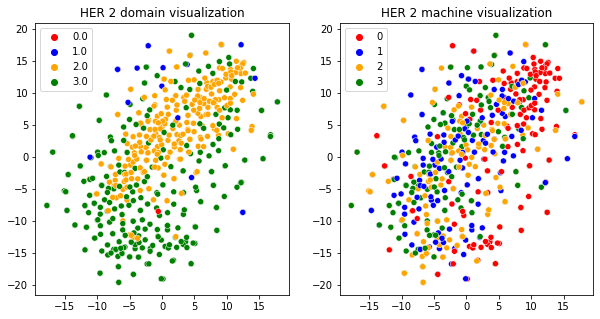

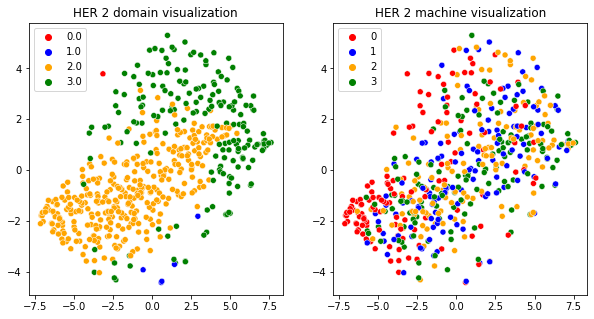

In [201]:
TSNE_funtion(32, 10, 300, Z,domain, machine_num, produce_visuals=True)
TSNE_funtion(32, 10, 300, Z_p,domain_p, machine_num_p, produce_visuals=True)

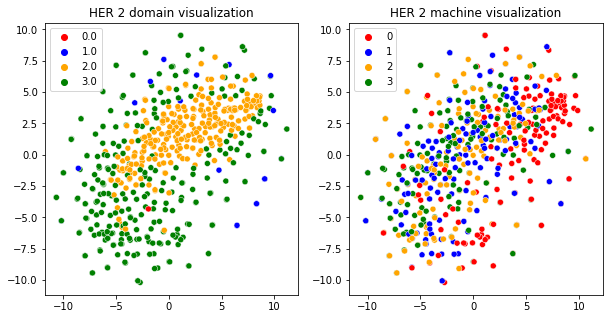

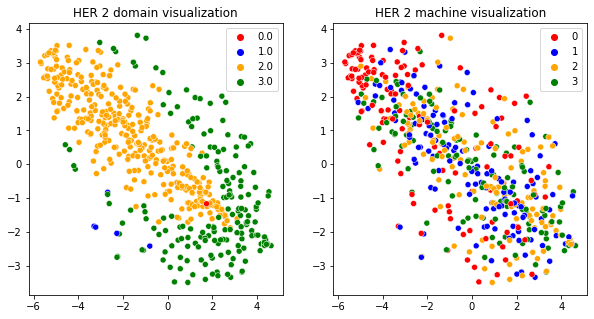

In [203]:
TSNE_funtion(80, 20, 800, Z,domain, machine_num, produce_visuals=True)
TSNE_funtion(80, 20, 800, Z_p,domain_p, machine_num_p, produce_visuals=True)

In [212]:
def machines_per_domain(domain, machine, experiment_name):
    plt.figure(figsize = (15,5))
    for i in range(1, 4):
        ND=0
        H1=0
        H2=0
        FD=0

        for j in range(len(machine)):
            if domain[j] == i and machine[j]=='ND':
                ND+=1
            if domain[j] == i and machine[j]=='H1':
                H1+=1
            if domain[j] == i and machine[j]=='H2':
                H2+=1
            if domain[j] == i and machine[j]=='FD':
                FD+=1
        plt.subplot(1,4,i)    
        plt.bar([0, 2, 4, 6], [ND, H1, H2, FD])
        plt.xticks([0, 2, 4, 6], ['ND', 'H1', 'H2', 'FD'])
        plt.title(experiment_name+': Domain # ' +str(i))
        plt.ylim(0, 100)


    plt.show() 

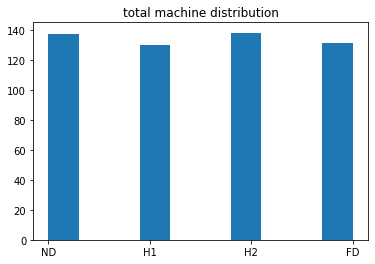

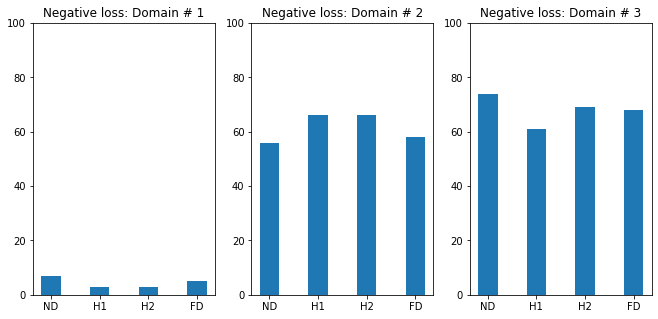

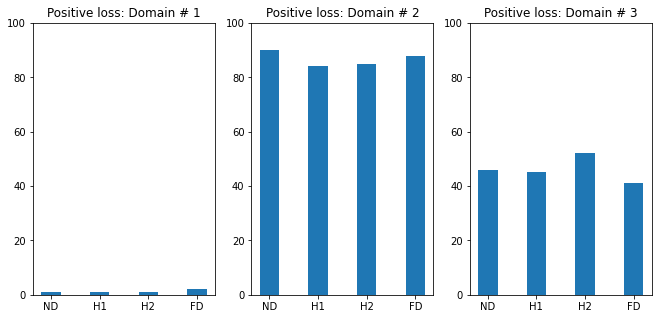

In [215]:
plt.hist(machine)
plt.title('total machine distribution')
machines_per_domain(domain, machine, 'Negative loss')
machines_per_domain(domain_p, machine_p, 'Positive loss')

In [255]:
def domain_per_machine(domain, machine, experiment_name):
    plt.figure(figsize = (15,5))
    domain_names = np.unique(domain)
    for i in range(0, 4):
        
        d1 = 0
        d2 =0
        d3 =0
        

        for j in range(len(machine)):
       
            if domain[j]==domain_names[1] and machine_num[j]==i:
                d1+=1
            if domain[j]== domain_names[2] and machine_num[j]== i:
                d2+=1
            if domain[j]==domain_names[3] and machine_num[j]==i:
                d3+=1
        print([d1, d2, d3])
        plt.subplot(1,4,i+1)    
        plt.bar([0, 2, 4], [d1, d2, d3])
        plt.xticks([0, 2, 4], ['D1', 'D2', 'D3'])
        plt.title(experiment_name+': Machine # ' +str(i+1))
        plt.ylim(0, 100)


    plt.show() 

[5, 58, 68]
[3, 66, 61]
[3, 66, 69]
[7, 56, 74]


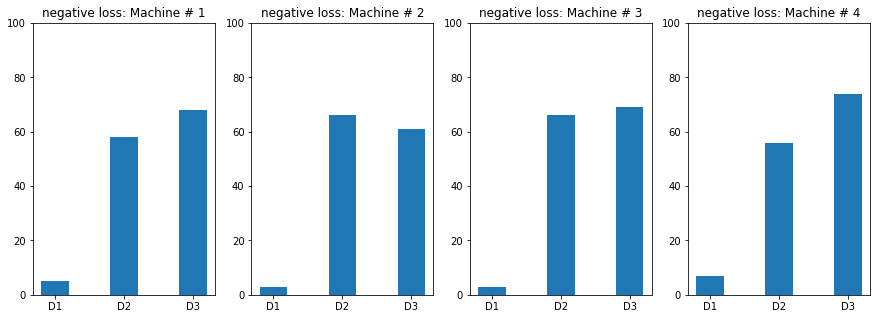

In [256]:
domain_per_machine(domain, machine, 'negative loss')

[2, 88, 41]
[1, 84, 45]
[1, 85, 52]
[1, 90, 46]


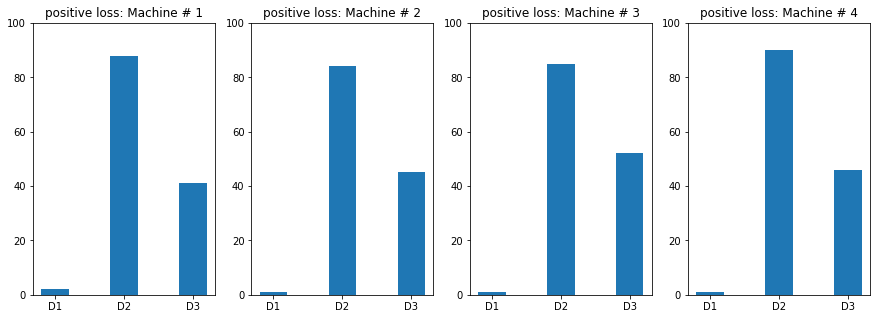

In [257]:
domain_per_machine(domain_p, machine_p, 'positive loss')